<h1>Análise Fundamentalista com Python</h1>

<h2>1.0 Bibliotecas</h2>

In [47]:
import fundamentus       as fdm
import pandas            as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

<H2>2.0 Screening</H2>

In [7]:
# get_resultado acessa a base de dados do site 'fundamentus' e retorna todos os indicadores fundamentalistas de todos os ativos
# listados na B3.

df = fdm.get_resultado()
df.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,23.32,-11.15,3.04,2.509,0.0000,1.073,-11.03,-2298.83,-2.30,-3015.68,31.23,-0.0011,-0.2168,-0.0005,-0.2728,0.63,5663500.0,9.069470e+08,1.12,0.0118
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1522,0.00,0.0,5.303110e+09,0.00,0.4341
ABCB4,17.70,4.96,0.75,0.000,0.0612,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1522,0.00,15821600.0,5.303110e+09,0.00,0.4341
ABEV3,14.82,15.83,2.75,2.854,0.0514,1.723,-920.30,14.64,-17.10,14.09,10.40,0.1950,0.1856,0.1559,0.1735,0.99,347084000.0,8.499960e+10,0.04,0.1373
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641


In [8]:
# Verificando as colunas presentes no df

print(df.columns)

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')


In [15]:
# Filtrando um ativo específico

df.loc['PETR4']

Multiples
cotacao     2.805000e+01
pl          2.010000e+00
pvp         9.100000e-01
psr         5.730000e-01
dy          4.613000e-01
pa          3.740000e-01
pcg         1.273000e+01
pebit       1.220000e+00
pacl       -8.800000e-01
evebit      1.900000e+00
evebitda    1.520000e+00
mrgebit     4.695000e-01
mrgliq      2.858000e-01
roic        3.384000e-01
roe         4.525000e-01
liqc        1.220000e+00
liq2m       1.637530e+09
patrliq     4.020840e+11
divbpatr    6.700000e-01
c5y         1.861000e-01
Name: PETR4, dtype: float64

In [19]:
# Filtrando apenas o PL um ativo específico

df.loc[['PETR4', 'ABEV3'], ['pl']]

Multiples,pl
papel,
PETR4,2.01
ABEV3,15.83


In [20]:
# Criando uma consulta a partir de uma lista de ativos

setor = ['PETR3', 'PETR4', 'PRIO3', 'CSAN3', 'ENAT3', 'VBBR3', 'UGPA3', 'DMMO3', 'LUPA3']

df.query('index in @setor')

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
CSAN3,17.13,-134.72,1.64,0.774,0.0250,0.243,4.61,5.19,-0.53,12.41,8.32,0.1492,0.0440,0.0530,-0.0122,1.41,1.737640e+08,1.960490e+10,2.86,0.3923
DMMO3,1.76,-258.65,-1.72,2.854,0.0000,3.346,11.90,6.37,-1.37,5.90,5.42,0.4481,-0.0110,0.7039,0.0066,2.25,0.000000e+00,-5.532750e+08,0.00,-0.1737
ENAT3,13.50,5.98,0.86,1.802,0.0111,0.454,3.82,4.60,-2.68,4.58,3.16,0.3918,0.3013,0.1548,0.1437,1.65,2.157670e+07,4.176870e+09,0.48,0.2530
LUPA3,3.32,3.59,0.61,1.055,0.0000,0.196,2.22,-7.62,-0.49,-17.56,-61.18,-0.1385,0.2938,-0.0267,0.1712,1.47,2.478020e+06,1.745220e+08,0.82,0.1569
PETR3,31.23,2.24,1.01,0.638,0.4144,0.416,14.17,1.36,-0.97,2.04,1.63,0.4695,0.2858,0.3384,0.4525,1.22,4.311450e+08,4.020840e+11,0.67,0.1861
PETR4,28.05,2.01,0.91,0.573,0.4613,0.374,12.73,1.22,-0.88,1.90,1.52,0.4695,0.2858,0.3384,0.4525,1.22,1.637530e+09,4.020840e+11,0.67,0.1861
PRIO3,34.28,8.64,2.86,3.977,0.0000,1.187,43.05,6.66,-2.74,8.85,8.18,0.5968,0.4602,0.1864,0.3312,1.22,4.264890e+08,1.062900e+10,0.99,0.7263
UGPA3,17.88,12.38,1.68,0.140,0.0056,0.590,2.77,5.25,-3.35,7.55,5.92,0.0266,0.0116,0.1548,0.1354,1.87,1.433150e+08,1.189190e+10,1.13,0.1243
VBBR3,17.35,15.63,1.59,0.111,0.0426,0.502,1.54,6.49,-3.37,10.16,8.63,0.0171,0.0071,0.1031,0.1019,2.57,2.277200e+08,1.269500e+10,1.36,0.1809


<h3>Filtros</h3>

In [44]:
# Filtrar os papéis com P/L acima de 15 e DY acima de 5%

filtro = df[(df.pl < 7) & (df.dy > 0.1)]

Text(0.5, 1.0, 'Ativos com PL menor de 7 e DY acima de 10%')

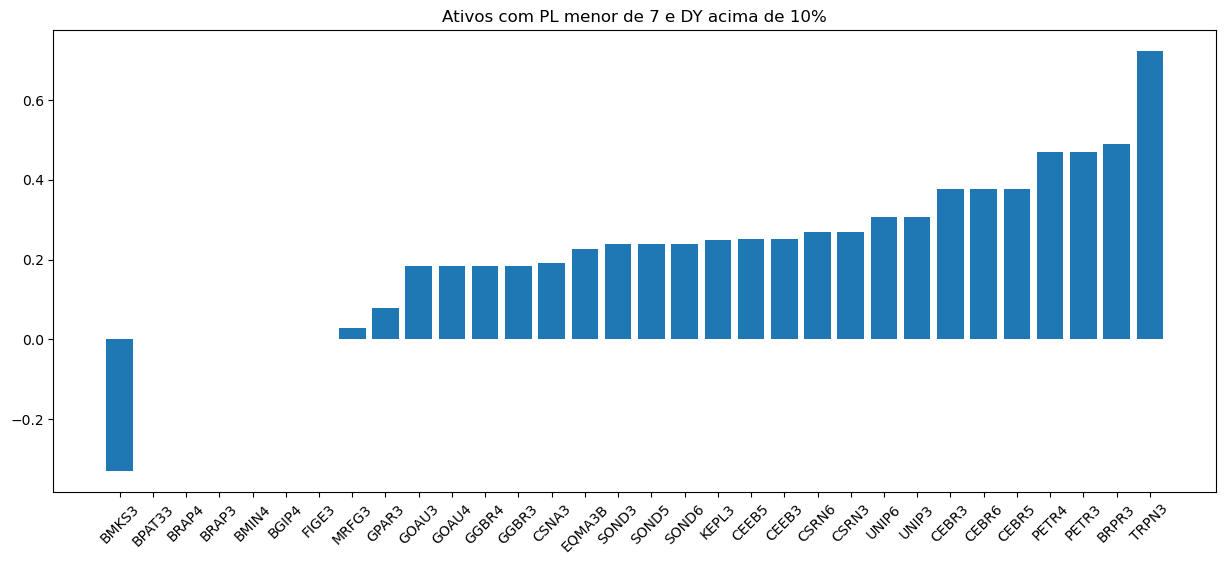

In [53]:
plt.figure(figsize = (15, 6)) # configurando o tamanho do gráfico
filtro.sort_values('mrgebit', inplace = True) # ordenando o df pelo valor da Margem do Ebtida
plt.bar(filtro.index, filtro.mrgebit)
plt.xticks(rotation = 45) 
plt.title('Ativos com PL menor de 7 e DY acima de 10%')

Text(0.5, 1.0, 'Ativos com PL menor de 9, DY acima de 7% e EBTIDA acima de 30%')

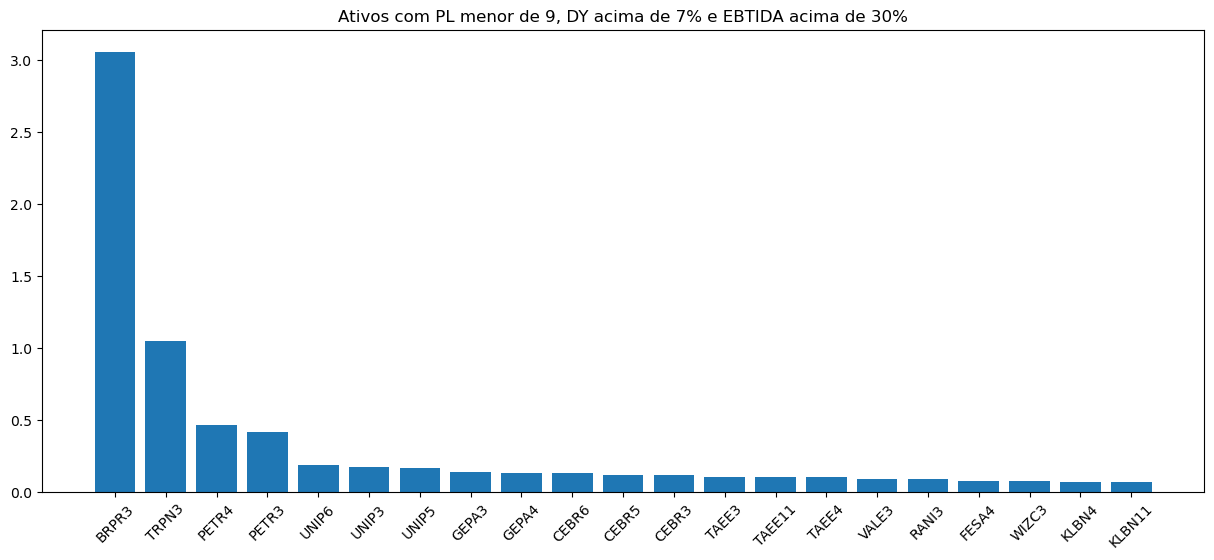

In [59]:
# Filtrar os papéis com P/L acima de 7 e DY acima de 10% e EBTIDA acima de 30%

filtro2 = df[(df.pl < 9) & (df.dy > 0.07) & (df.mrgebit > 0.3)]
filtro2.sort_values('dy', ascending = False, inplace = True)

# Gráfico
plt.figure(figsize = (15, 6)) # configurando o tamanho do gráfico
plt.bar(filtro2.index, filtro2.dy)
plt.xticks(rotation = 45) 
plt.title('Ativos com PL menor de 9, DY acima de 7% e EBTIDA acima de 30%')